In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [48]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [49]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

Import train_test_split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [53]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
import matplotlib.pyplot as plt

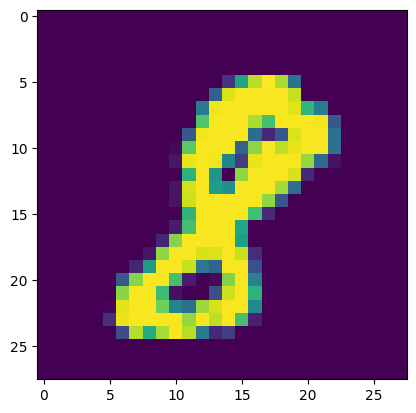

In [55]:
plt.imshow(df.iloc[39812,1:].values.reshape(28,28))

for PCA the first step is StandardScaler

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**PCA** here we will take n_components as none , you can take whatever u want

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [59]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

lets take an algorithm knn classifier

In [61]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
y_pred = knn.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_pred)

0.935